# EDA

In [1]:
import pandas as pd
df = pd.read_parquet('koinworks_fix.pkl')

# Visualization

In [2]:
import texthero.visualization as v

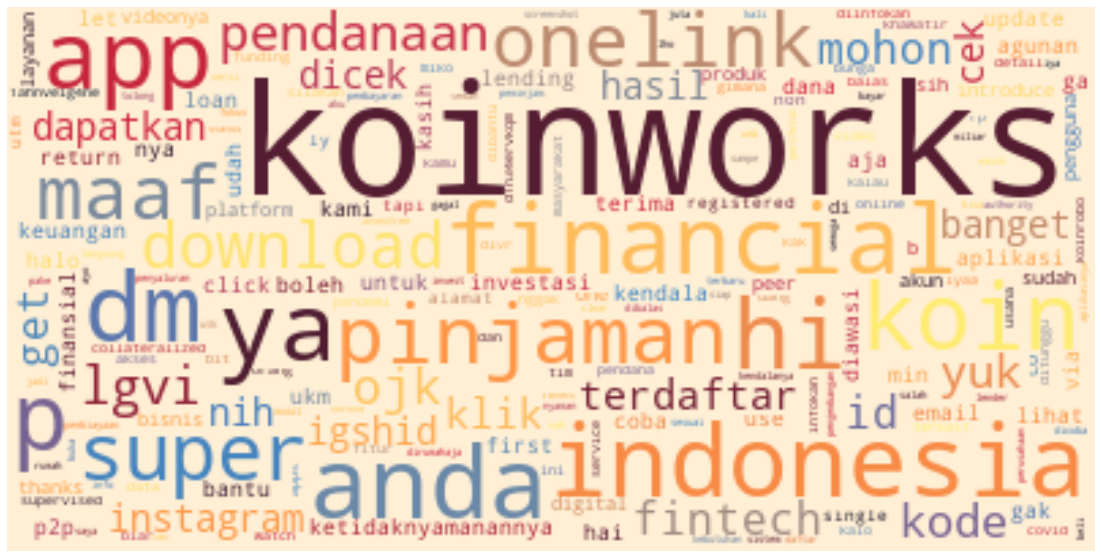

In [3]:
v.wordcloud(df['cleaned'])

In [4]:
df.columns

Index(['date', 'username', 'cleaned', 'tweet', 'name', 'tfidf', 'pca'], dtype='object')

In [5]:
df.pca

0        [-0.05180442387412819, -0.06042797706543679]
1        [-0.02154069881054305, -0.04182074652136472]
2           [0.3234825932460494, -0.1599972965680674]
3         [-0.09027465084146337, 0.05607418130788909]
4        [-0.07068461959142404, -0.05178775147457277]
                            ...                      
3089       [0.01791554723572735, -0.0574812523349313]
3090    [-0.017573259846677437, -0.06614480871235559]
3091        [-0.11205496112340492, 0.170266837324282]
3092    [-0.05797207820413722, -0.059589873023907516]
3093     [-0.06840345672687964, -0.05306233118678486]
Name: pca, Length: 3094, dtype: object

In [6]:
X,y= [],[]
for item in df.pca: 
    
    X.append(item[0])
    y.append(item[1])

In [7]:
import plotly.express as px

In [8]:
plot_df = df[['username']]
plot_df['id'] = [a for a in range(len(df))]
plot_df['x'] = X
plot_df['y'] = y

/home/svmihar/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/svmihar/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/svmihar/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [9]:
X[0]

-0.05180442387412819

In [10]:
px.scatter(plot_df, x='x', y='y', text='id')

In [11]:
df['id'] = plot_df['id']

In [12]:
df[df['id']==2498]

date   username                                            cleaned  \
2498 2019-12-23  koinworks  libur libur hore hore siapa menyambut liburan ...   

                                                  tweet       name  \
2498  Libur akan tiba.. Libur akan tiba.. Hore Hore!...  KoinWorks   

                                                  tfidf  \
2498  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               pca    id  
2498  [-0.05183443271500541, -0.05641997479708596]  2498

## kmeans

In [13]:
from texthero.representation import kmeans

In [14]:
df['kmeans'] = df['tfidf'].pipe(kmeans, n_clusters=3).astype(str)

In [15]:
v.scatterplot(df, 'pca', color='kmeans', title='kmeans tweet')

In [29]:
v.top_words(df[df['kmeans']=='0'].cleaned)

koinworks       1126
ya               336
fintech          208
instagram        191
indonesia        189
                ... 
tengkyuu           1
acunting           1
damai              1
revolution         1
andisetiawan       1
Name: cleaned, Length: 7695, dtype: int64

# Tweet trends

In [17]:
df_trend = df.groupby(df['date'].dt.date)['name'].count()

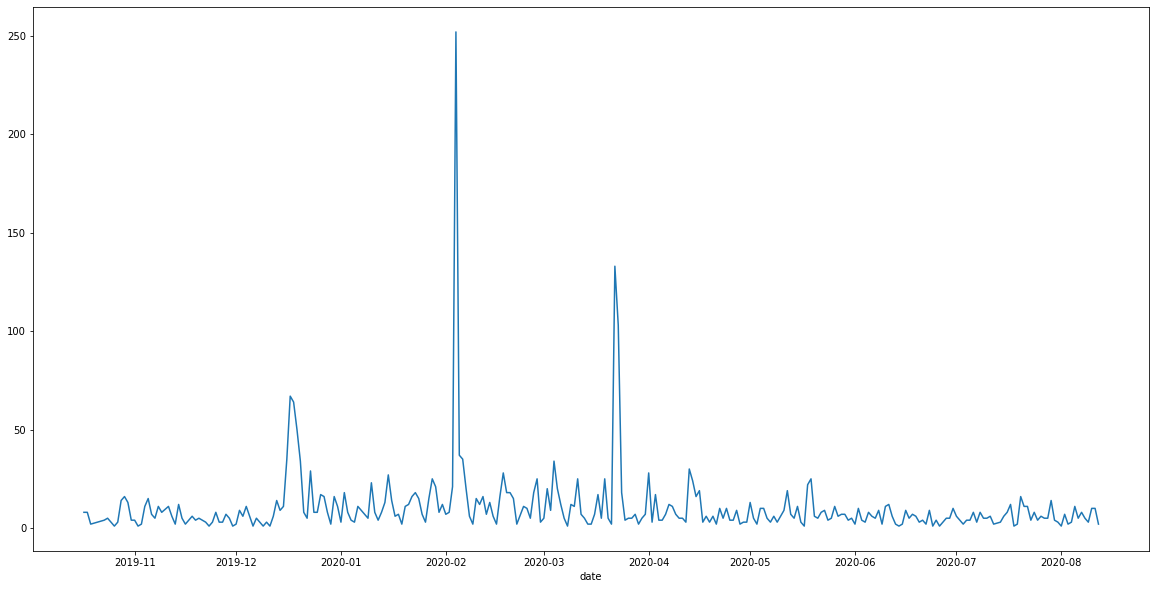

In [18]:
df_trend.plot(kind='line', figsize=(20,10))

In [19]:
df_trend=df_trend.reset_index()

In [20]:
df_trend.sort_values('name', ascending=False)

date  name
105  2020-02-04   252
151  2020-03-22   133
152  2020-03-23   103
56   2019-12-17    67
57   2019-12-18    64
..          ...   ...
207  2020-05-17     1
40   2019-11-30     1
7    2019-10-26     1
50   2019-12-11     1
266  2020-07-18     1

[292 rows x 2 columns]

so what the hell happened in 4th feb 2020 and 9th january 2020?

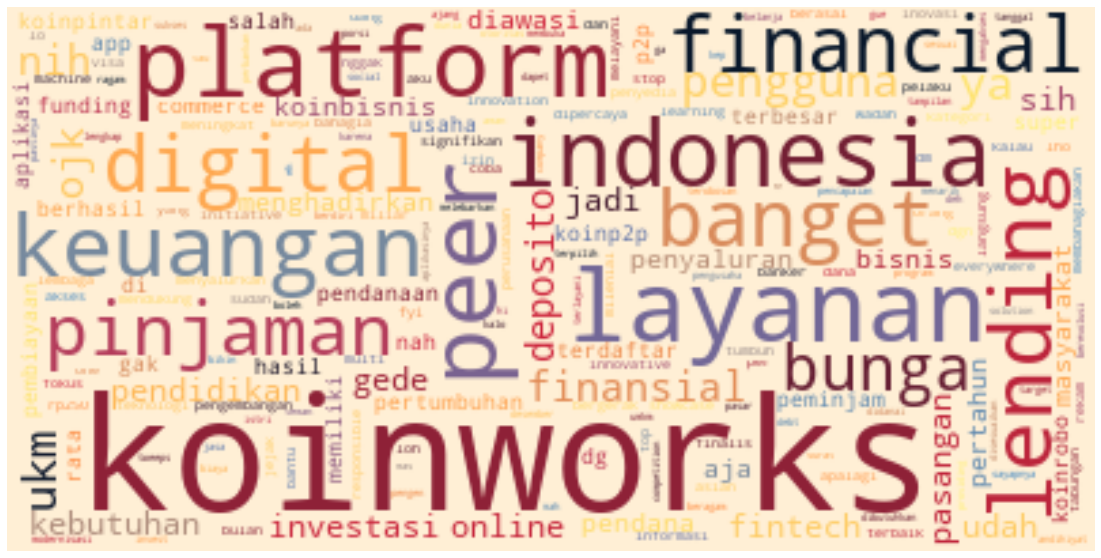

In [21]:

from datetime import datetime
v.wordcloud(df[df['date']==datetime(2020,2,4)].cleaned)